# **Bài tập lớn - Homework 1 - CS246**
# **Bài 4: LSH for Approximate Near Neighbor Search**
**Lớp học phần: DAT712_222_8_L14**

**Thành viên nhóm:**
* **Trịnh Nguyễn Nhật An - MSSV: 050608200222**
* **Nguyễn Hữu Viết Ngọc - MSSV: 050608200489**
* **Võ Ngọc Khánh Vy - MSSV: 050608200791**

### **Câu (a):**
Đối với mỗi $ 1 ≤ j ≤ L $, và mỗi điểm dữ liệu $ x ∈ T, Pr[x ∈ T ∩ W{}_j] ≤ p^{k}_2 = \frac{1}{n}) $, do đó $ E[|T ∩ W{}_j|] ≤ 1$. 

Theo tính tuyến tính của kỳ vọng, $ E[ \sum_{j=1}^{L}| T ∩ W{}_j|] ≤ L $. 

Do đó, ứng dụng của bất đẳng thức Markov đưa ra giới hạn xác suất mong muốn.

### **Câu (b):**
Vì $ d(x^{*}, z) ≤ λ $, với mọi $ 1 ≤ j ≤ L $

Ta có: $ Pr[g{}_j (x^{*}) = g{}_j (z)] ≥ p^{k}_1 $

Do đó: $ Pr[g{}_j (x^{*}) ≠ g{}_j (z)] ≤ 1-p^{k}_1 = 1 - \frac{1}{L} $ 

Trong đó đẳng thức $ p^{k}_1 = p{}_1^{\log{}_{1/p{}_2}{(n)}} = n^{-\frac{\log{(1/p{}_1)}}{\log{(1/p{}_2)}}} = n^{-\rho} = L^{-1} $

Khi đó, vì $g{}_j$ có tính độc lập, ta có $ Pr[\forall 1 ≤ j ≤ L, g{}_j (x^{*}) ≠ g{}_j (z)] ≤ (1 - \frac{1}{L})^{L} ≤ \frac{1}{e} $

### **Câu (c):**
Gọi tập hợp các điểm ANN là U, ta có $ U = {x∈A; d(x,z) ≤ cλ}, x^{*}∈U $. Có 2 cách mà vị trí báo cáo không là (c,λ)-ANN.

- ***Cách 1:***

Không có điểm ANN nào được băm vào cùng nhóm như $z$, có nghĩa là $\forall 1 ≤ j ≤ L, W{}_j ∩ U = ∅$. 

Ta gọi E sự kiện là "không có điểm ANN nào được băm vào cùng nhóm như $z$". Vì $x^{*}∈U$, ta dùng câu (b):

$ Pr[E] ≤ Pr[x^{*}∉\bigcup\limits_{j=1}^{L} W{}_j] = Pr[\forall 1 ≤ j ≤ L, g{}_j (x^{*}) ≠ g{}_j (z)] < \frac{1}{e} $

- ***Cách 2:***

Có ít nhất 1 điểm $(c,λ)$-ANN được băm vào các nhóm gồm $z$ được băm, nhưng có nhiều hơn $3L$ điểm ở khoảng cách lớn hơn $cλ$ trong tập hợp các nhóm đó. Nếu có ít hơn $3L$ điểm ở khoảng cách lớn hơn $cλ$ trong $\bigcup\limits_{j=1}^{L} W{}_j$, thuật toán cần trả về a$(c,λ)$-ANN. 

Gọi F sự kiện là “có nhiều hơn $3L$ điểm ở khoảng cách lớn hơn $cλ$ từ $z$ trong tập hợp các nhóm bao gồm $z$ được băm”.

Trong trường hợp này ta áp dụng câu (a) và biết rằng sự kiện F xuất hiện với xác suất nhỏ hơn $\frac{1}{3}$.

Gọi $\overline{\text{p}}$ là xác suất mà tại điểm đó thuật toán trả về không phải là $(c,λ)$-ANN, ta có: 

$\overline{\text{p}} = Pr[E∪F] ≤ Pr[E] + Pr[F] < \frac{1}{3} + \frac{1}{e}$ (bởi định lý tổng xác suất - union bound). 

Do đó, thuật toán luôn cho ra một $(c,λ)$ thực tế với xác suất lớn hơn $1 - \frac{1}{3} - \frac{1}{e}$ .



### **Câu (d):**

In [1]:
from lsh import *
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

**Đọc dữ liệu và thiết lập giá trị cho một số biến**

**Lưu ý**: Bởi vì file `patches.csv` có kích thước khá lớn ~ 500MB nên khuyến khích tải file lên google drive và liên kết với notebook Colab này.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Load data
A = load_data('patches.csv')
print("Data shape: {}".format(A.shape))

Data shape: (59500, 400)


In [3]:
# Set parameters
L = 10
k = 24
num_neighbors = 3

# Define query points
query_indices = range(100, 1100, 100)
print("Query points: {}".format([i for i in query_indices]))

Query points: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [4]:
# Run LSH setup
functions, hashed_A = lsh_setup(A, k=k, L=L)

**Xác định 3 ứng viên gần giống nhất với mỗi điểm truy vấn, sử dụng LSH và tìm kiếm tuyến tính**

In [5]:
# Perform LSH and linear search
lsh_search_times = [] # Time taken to run LSH search
linear_search_times = [] # Time taken to run linear search
lsh_neighbors_list = [] # List of LSH neighbors
linear_neighbors_list = [] # List of linear neighbors

for query_index in query_indices:
    # Run LSH search
    start_time = time.time()
    lsh_neighbors = lsh_search(A, hashed_A, functions, query_index, num_neighbors=num_neighbors)
    lsh_neighbors_list.append(lsh_neighbors)
    lsh_search_times.append(time.time() - start_time)
    
    # Run linear search
    start_time = time.time()
    linear_neighbors = linear_search(A, query_index, num_neighbors=num_neighbors)
    linear_neighbors_list.append(linear_neighbors)
    linear_search_times.append(time.time() - start_time)

In [6]:
# Print results
print("LSH Average Search Time: {:.4f} seconds".format(np.mean(lsh_search_times)))
print("Linear Average Search Time: {:.4f} seconds".format(np.mean(linear_search_times)))

headers = ['Query Index', 'LSH Neighbors', 'Linear Neighbors']
table = []
for i in range(len(query_indices)):
    table.append([query_indices[i], 
                  ", ".join(map(str, lsh_neighbors_list[i])), 
                  ", ".join(map(str, linear_neighbors_list[i]))])

print("Top 3 Neighbors for Each Query Point:")
print(tabulate(table, headers=headers, tablefmt='fancy_grid'))

LSH Average Search Time: 0.4851 seconds
Linear Average Search Time: 3.6468 seconds
Top 3 Neighbors for Each Query Point:
╒═══════════════╤═════════════════════╤═════════════════════╕
│   Query Index │ LSH Neighbors       │ Linear Neighbors    │
╞═══════════════╪═════════════════════╪═════════════════════╡
│           100 │ 7551, 8196, 28351   │ 7551, 8196, 28351   │
├───────────────┼─────────────────────┼─────────────────────┤
│           200 │ 91, 604, 52040      │ 91, 604, 1888       │
├───────────────┼─────────────────────┼─────────────────────┤
│           300 │ 15818, 22057, 10788 │ 15818, 22057, 9006  │
├───────────────┼─────────────────────┼─────────────────────┤
│           400 │ 56812, 42121, 58902 │ 28676, 33010, 5875  │
├───────────────┼─────────────────────┼─────────────────────┤
│           500 │ 1178, 557, 35904    │ 1178, 557, 35904    │
├───────────────┼─────────────────────┼─────────────────────┤
│           600 │ 49309, 373, 44503   │ 49309, 373, 44503   │
├──────────

**Thiết lập bộ giá trị L và K cho 2 case thử nghiệm**

In [7]:
# Define list of L values and k values to test
case_1 = {
    "L": [i for i in range(10, 22, 2)], 
    "k": [24]}
case_2 = {
    "L": [10],
    "k": [i for i in range(16, 26, 2)]}

**Xây dựng hàm đánh giá sai số**

In [8]:
def errors_evaluation(A, query_indices, num_neighbors, case):
    L_list, k_list = case["L"], case["k"]
    errors = []
    for L in L_list:
        for k in k_list:
            functions, hashed_A = lsh_setup(A, k=k, L=L)
            # Perform LSH search
            lsh_neighbors_list = []
            for query_index in query_indices:
                lsh_neighbors = lsh_search(A, hashed_A, functions, query_index, num_neighbors=num_neighbors)
                lsh_neighbors_list.append(lsh_neighbors)
            
            # Perform linear search
            linear_neighbors_list = []
            for query_index in query_indices:
                linear_neighbors = linear_search(A, query_index, num_neighbors=num_neighbors)
                linear_neighbors_list.append(linear_neighbors)
            
            # Calculate error
            error = 0
            for i in range(len(query_indices)):
                lsh_neighbors = lsh_neighbors_list[i]
                linear_neighbors = linear_neighbors_list[i]
                query_index = query_indices[i]
                error = error_measure(A, query_index, linear_neighbors, lsh_neighbors)
                error += error
            error = error / len(query_indices)
            errors.append((L, k, error))
    
    return errors

**Chạy đánh giá sai số**

\* *Lưu ý: thời gian thực thi sẽ lâu hơn đối với case đầu tiên và ít thời gian hơn cho case thứ hai.*

In [9]:
%%time
case_1_errors = errors_evaluation(A, query_indices, num_neighbors, case_1)

# Print errors for case 1
print("Case 1 Errors:")
for L, k, error in case_1_errors:
    print("(L: {}, k: {}) -> Error: {:.4f}".format(L, k, error))

Case 1 Errors:
(L: 10, k: 24) -> Error: 0.2013
(L: 12, k: 24) -> Error: 0.2270
(L: 14, k: 24) -> Error: 0.2017
(L: 16, k: 24) -> Error: 0.2606
(L: 18, k: 24) -> Error: 0.2036
(L: 20, k: 24) -> Error: 0.2130
CPU times: total: 3min 32s
Wall time: 6min 55s


In [10]:
%%time
case_2_errors = errors_evaluation(A, query_indices, num_neighbors, case_2)

# Print errors for case 2
print("Case 2 Errors:")
for L, k, error in case_2_errors:
    print("(L: {}, k: {}) -> Error: {:.4f}".format(L, k, error))

Case 2 Errors:
(L: 10, k: 16) -> Error: 0.2234
(L: 10, k: 18) -> Error: 0.2011
(L: 10, k: 20) -> Error: 0.2003
(L: 10, k: 22) -> Error: 0.2199
(L: 10, k: 24) -> Error: 0.0789
CPU times: total: 2min 6s
Wall time: 4min 47s


**Vẽ biểu đồ đánh giá sai số**

\* *Lưu ý: Kết quả sai số là ngẫu nhiên, cho nên những nhận xét dưới đây chỉ mang tính chất tham khảo.*

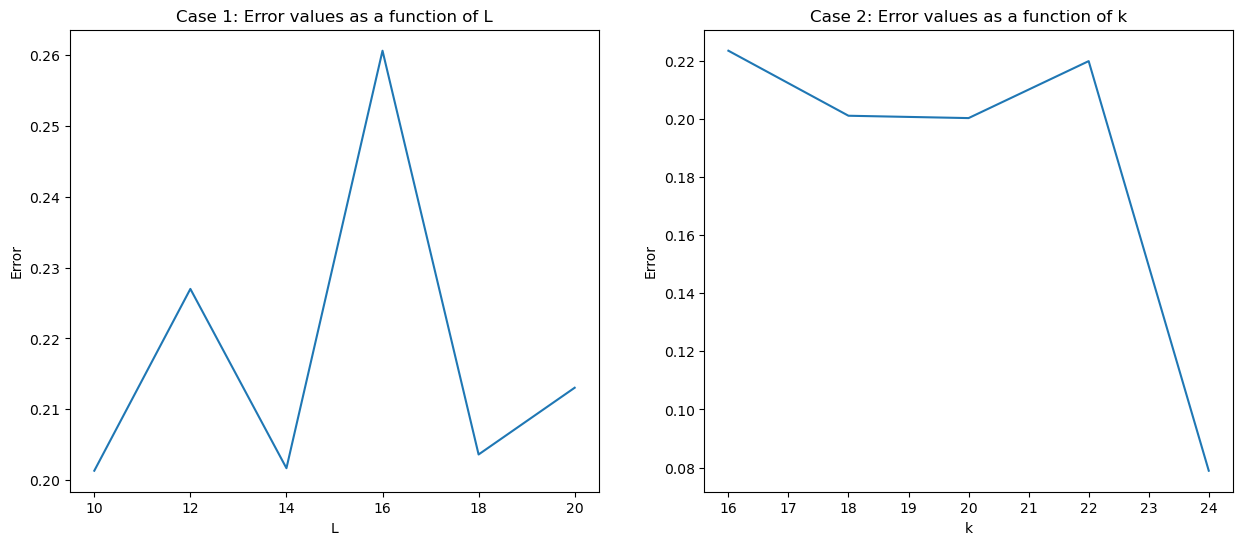

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot case 1
L_list_1 = case_1["L"]
k_1 = case_1["k"][0]
errors_1 = [error for _, _, error in case_1_errors]
ax[0].plot(L_list_1, errors_1) 

# Plot case 2
k_list_2 = case_2["k"]
L_2 = case_2["L"][0]
errors_2 = [error for _, _, error in case_2_errors]
ax[1].plot(k_list_2, errors_2)

ax[0].set_title("Case 1: Error values as a function of L")
ax[0].set_xlabel("L")
ax[0].set_ylabel("Error")

ax[1].set_title("Case 2: Error values as a function of k")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Error")

plt.show()

***Nhận xét:*** 
* Với đồ thị hàm số theo L, ta thấy rằng sai số biến động mạnh khi tăng giá trị của L lên 20.
* Với đồ thị hàm số theo k, ta thấy rằng sai số biến động nhẹ từ k=16 đến k=22, sau đó giảm mạnh khi tăng giá trị của k lên 24.

**Xác định 20 ứng viên gần giống nhất với điểm truy vấn thứ 100, bao gồm:**
* ***10 ứng viên được xác định bằng cách sử dụng LSH***
* ***10 ứng viên được xác định bằng cách tìm kiếm tuyến tính.***

In [12]:
# Define parameters
L = 24
k = 24
num_neighbors = 10
query_index = 100

# Run setup
functions, hashed_A = lsh_setup(A, k=k, L=L)

# Run LSH search
lsh_neighbors = lsh_search(A, hashed_A, functions, query_index, num_neighbors=num_neighbors)

# Run linear search
linear_neighbors = linear_search(A, query_index, num_neighbors=num_neighbors)

**Ảnh gốc của điểm truy vấn thứ 100**

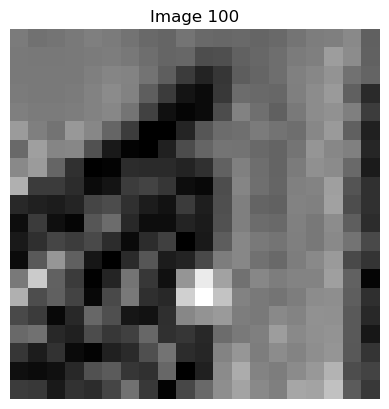

In [13]:
# Plot original image
plot(A, row_nums=[query_index], base_filename="original", output_path="image_output/")

**In ra ảnh của 10 ứng viên được xác định bằng cách sử dụng LSH**

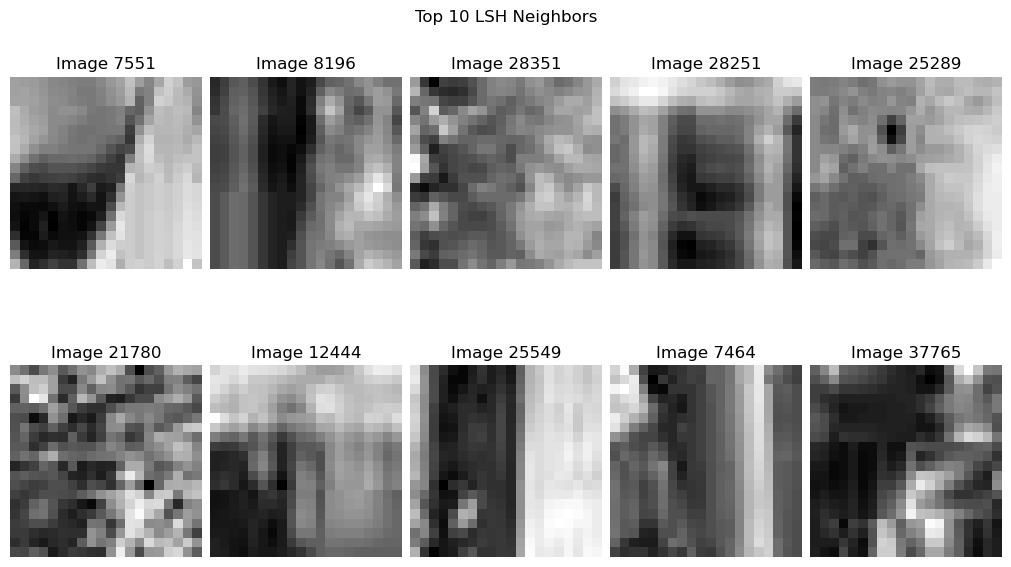

In [14]:
# Plot LSH neighbors
plot(A, 
     row_nums=lsh_neighbors, 
     base_filename="lsh_neighbors", 
     output_path="image_output/lsh/", 
     grid_size=(2, 5), title="Top 10 LSH Neighbors")

**In ra ảnh của 10 ứng viên được xác định bằng cách sử dụng tìm kiếm tuyến tính**

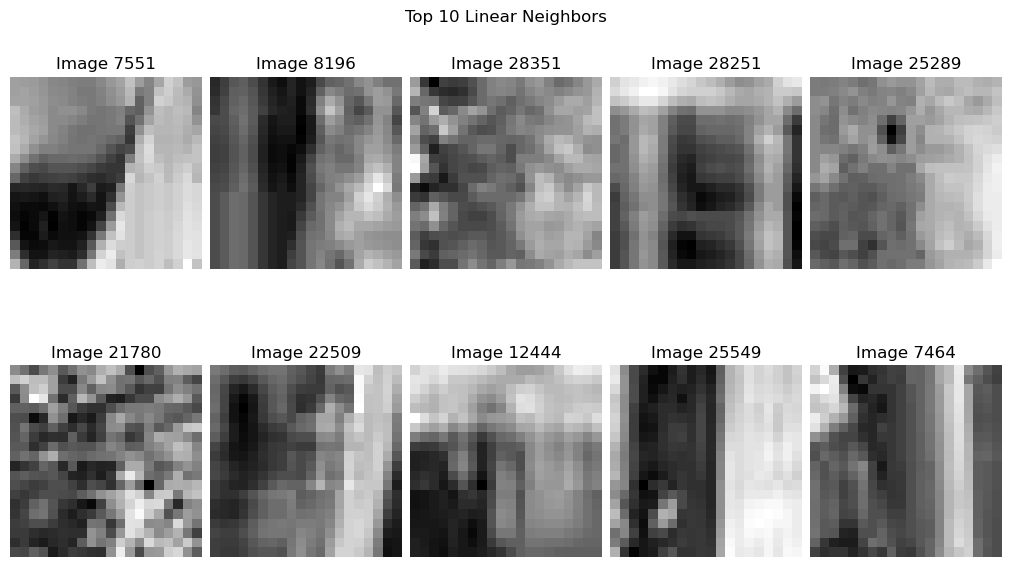

In [15]:
# Plot linear neighbors
plot(A, 
     row_nums=linear_neighbors, 
     base_filename="linear_neighbors", 
     output_path="image_output/linear/", 
     grid_size=(2, 5), 
     title="Top 10 Linear Neighbors")

**Kết luận:** Với 2 parameter `L=24` và `k=24`, ta nhận lại 20 ứng viên gần giống nhất với điểm truy vấn thứ `100`, bao gồm 10 ứng viên được xác định bằng cách sử dụng LSH và 10 ứng viên được xác định bằng cách tìm kiếm tuyến tính. Trong đó có 8 cặp ảnh trùng nhau bao gồm ảnh số `7551`, `8196`, `28351`, `28251`, `25289`, `21780`, `12444` và `25549`. Từ đó ta có thể thấy rằng khi càng tăng số lượng chiều dữ liệu `L` và số lượng hàm băm `k` thì độ sai số của 2 thuật toán càng chênh lệch ít đi.